In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import scipy.io as sio
import os
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
from sklearn import preprocessing

In [23]:
def print_top_features(clf, top_k=10, feature_names = []):
    """Prints features with the highest coefficient values, per class"""
#     feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        print clf.coef_
        top_features_idx = np.argsort(clf.coef_[i])[-top_k:]
        if feature_names == []:
            print("{}:{}".format(class_label, top_features_idx))
        else:
            print("%s: %s" % (class_label,
                  " ".join(feature_names[j] for j in top_features_idx)))

In [24]:
def plot_important_features(features, clf, feature_name_list=[], num_selected_features=50):
    importances = clf.feature_importances_
    X = np.array(features)
    std = np.std([tree.feature_importances_ for tree in clf.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(0,num_selected_features):
        if feature_name_list == []:
            print("%d, (%f)" % (f + 1, importances[indices[f]]))
        else:
            print("%d. feature %s (%f)" % (f + 1, feature_name_list[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(num_selected_features), importances[indices[:num_selected_features]],
           color="r", yerr=std[indices[:num_selected_features]], align="center")
    plt.xticks(range(num_selected_features), indices[:num_selected_features])
    plt.xlim([-1, num_selected_features])
    plt.show()

In [49]:
def run_experiments(X, Y, feature_name_list=[], top_k=50):
    # iterate over classifiers
    '''
    print('Accuracy of different classifier, without Normalization')
    for name, clf in zip(clf_names, classifiers):
        scores = cross_val_score(clf, X, Y, cv=5)
        print("{}, {}/{}".format(name, np.mean(scores), np.std(scores)))
    
    adaboost_clf = AdaBoostClassifier()
    adaboost_clf.fit(X, Y)
    plot_important_features(X, adaboost_clf, feature_name_list, 50)
    '''
    
    print('Accuracy of different classifier, with Normalization')
    normalization_methods_name = ['StandardScaler', 'Normalizer']#, 'RobustScaler'
    normalization_methods = [StandardScaler(), Normalizer()]#, RobustScaler(),
    # iterate over classifiers
    for name, clf in zip(clf_names, classifiers):
        for norm_name, norm in zip(normalization_methods_name, normalization_methods):
            scores = cross_val_score((make_pipeline(norm, clf)), X, Y, cv=5)
            print("{},{}, {}/{}".format(name, norm_name, np.mean(scores), np.std(scores)))
    
    print('Scaled')
    X_scaled = preprocessing.scale(X)
#     scaled_adaboost_clf = make_pipeline(StandardScaler(), AdaBoostClassifier())
    clf = AdaBoostClassifier()
    clf.fit(X_scaled, Y)
    plot_important_features(X_scaled, clf, feature_name_list, top_k)
    
    print('Normalization')
    X_normalized =  preprocessing.normalize(X, norm='l2')
    clf = AdaBoostClassifier()
    clf.fit(X_normalized, Y)
    plot_important_features(X_normalized, clf, feature_name_list, top_k)

# prepare data into libsvm format

In [ ]:
import numpy as np
import pandas as pd

input_file = "mydata.csv"

# comma delimited is the default
df = pd.read_csv(input_file, header = 0)

# put the original column names in a python list
original_headers = list(df.columns.values)
feature_name_list = original_headers[1:]
'''
# remove the non-numeric columns
df = df._get_numeric_data()

# put the numeric column names in a python list
numeric_headers = list(df.columns.values)
'''

# create a numpy array with the numeric values for input into scikit-learn
numpy_array = df.as_matrix()

X = numpy_array[:,0]
Y = numpy_array[:,1:]

Accuracy of different classifier, with Normalization
Nearest Neighbors,StandardScaler, 0.59123661149/0.0432896981435
Nearest Neighbors,Normalizer, 0.654819863681/0.0666831301588
Gaussian Process,StandardScaler, 0.583771502759/0.00298604349237
Gaussian Process,Normalizer, 0.583771502759/0.00298604349237
Decision Tree,StandardScaler, 0.672314183707/0.0583105420527
Decision Tree,Normalizer, 0.685329438494/0.0445051558142
Random Forest,StandardScaler, 0.60405712431/0.0324047616061
Random Forest,Normalizer, 0.583771502759/0.00298604349237
Neural Net,StandardScaler, 0.621454073353/0.0848753570729
Neural Net,Normalizer, 0.583771502759/0.00298604349237
AdaBoost,StandardScaler, 0.763842908147/0.0247930650832
AdaBoost,Normalizer, 0.682700421941/0.0462521168137
Naive Bayes,StandardScaler, 0.519993508601/0.0800932092568
Naive Bayes,Normalizer, 0.558227848101/0.0397073092186
QDA,StandardScaler, 0.505095748134/0.0450090400604
QDA,Normalizer, 0.487244401168/0.0420417192276
Scaled
Feature ranking:
1. 

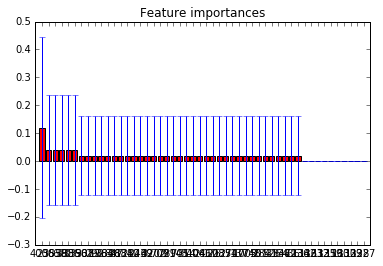

Normalization
Feature ranking:
1. feature  (0.160000)
2. feature Postcentral_R-Angular_R (0.020000)
3. feature Rectus_R-SupraMarginal_R (0.020000)
4. feature Precentral_R-Calcarine_L (0.020000)
5. feature Frontal_Sup_Orb_L-Occipital_Inf_R (0.020000)
6. feature Rolandic_Oper_R-Frontal_Med_Orb_L (0.020000)
7. feature Rolandic_Oper_R-Frontal_Med_Orb_R (0.020000)
8. feature Calcarine_L-Occipital_Sup_R (0.020000)
9. feature Calcarine_L-Occipital_Inf_L (0.020000)
10. feature Calcarine_L-Angular_L (0.020000)
11. feature Putamen_L-Temporal_Mid_R (0.020000)
12. feature Lingual_L-Angular_R (0.020000)
13. feature Frontal_Med_Orb_L-Precuneus_L (0.020000)
14. feature Supp_Motor_Area_R-Angular_L (0.020000)
15. feature Cingulum_Mid_R-Occipital_Mid_R (0.020000)
16. feature Fusiform_R-Parietal_Inf_L (0.020000)
17. feature Cuneus_R-Temporal_Sup_R (0.020000)
18. feature Calcarine_R-Occipital_Inf_L (0.020000)
19. feature Frontal_Sup_Orb_L-Occipital_Mid_L (0.020000)
20. feature Cingulum_Mid_L-Lingual_R (0.

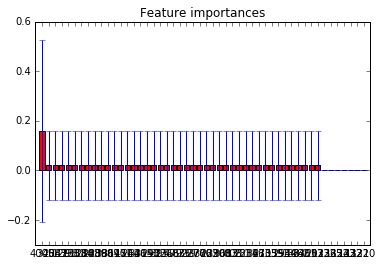

In [50]:
run_experiments(X, Y, feature_name_list)